In [20]:
#Gavin Farrell - 17/8/2021
#Title: Process Biosynthetic MetaSpades text files

#Code functions:
#-Read in a muti-file compiled Biosynthetic MetaSpades .txt file
#-Parse out BGC data in .txt file to a .tsv file for graphing in R
#-Normalisation and comparison of Biosynthetic MetaSpades data sets

#1. Open .txt file from Biosynthetic MetaSpades
#!!!Rename files/paths as necessary!!!
with open('/home/user/B_MetaSpades_output.txt') as bgc:
    bgcs_string = bgc.read() #all in one string

#1.1 Count overall predicted BGCs in .txt file
bgcs_string.count('Predicted type')

Types
pks nrps nrps_pks other
36968 9255 343 9477

CRC Total BGCs = 56043 
CRC Average no. BGCs/sample = 1273


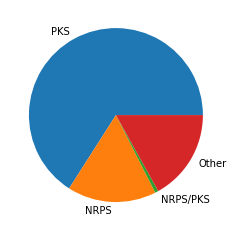

In [167]:
#2. Parse out the four types of BGC family categories from Biosynthetc MetaSpades data into variables
pks = bgcs_string.count('Predicted type: PKS')
nrps = bgcs_string.count('Predicted type: NRPS')
nrps_pks = bgcs_string.count('Predicted type: NRPS/PKS')
other = bgcs_string.count('Predicted type: Custom')

#2.1 Show the four tpes of BGC and returned counts below
print('Types:')
print('pks','nrps','nrps_pks','other')
print(pks,nrps,nrps_pks,other)
print( )
total = (pks+nrps+nrps_pks+other)
avrg = total/44 #change value to number of samples compiled in .txt

#2.2 Show the average number BGCs per samples used; eg: 44 samples in this compiled .txt file, only use if comiled Biosynthetic MetaSpades data
print('CRC Total BGCs =',total,'\n'
     'CRC Average no. BGCs/sample = ' + str(math.trunc((avrg))) )

#2.3 Quick visualisation of data returned from parsing the file using Matplotlib
#import packages for visualisation
import matplotlib.pyplot as plt
import numpy as np

#Pie chart of distributon of 4 BGC family classifications
bgc_fam_chart = np.array([pks, nrps, nrps_pks, other])
mylabels = ["PKS", "NRPS", "NRPS/PKS", "Other"]
plt.pie(bgc_fam_chart, labels = mylabels)
plt.show() 

#Barchart of distributon of 4 BGC family classifications
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mylabels = ["PKS", "NRPS", "NRPS/PKS", "Other"]
students = [pks,nrps,nrps_pks,other]
ax.bar(mylabels,students)
plt.show()

In [156]:
#3. Parse out the six types of BGC domain categories from Biosynthetc MetaSpades data into variables

#import math package for calculations
import math

#3.1 Read in file 
with open('/home/user/B_MetaSpades_output.txt') as bgc:
    bgcs = bgc.readlines() #all in one string

#3.2 Defines reusable Domain parsing function 
def domain_parse(domain_str):
        """Parses domains in combined bgc stats txt files""" 
        new = 0
        y = 0
        #Account for blunt parsing, depending on counts in users files returned -> may need to adjust code
        if (len(domain_str)) == 11:
            line_parse = 14
        else:
            line_parse = 15
        
        #Parse out domain data and calculate stats
        for line in bgcs:
            if line.startswith(str(domain_str)):
                x = (int(line[line_parse:19]))
                new = new + x
                y = y + 1
        avrg = int(new)/y
        print('Total' + domain_str + ' = ' + str(new) + '\n'
          '-Average ' + domain_str + ' = ' + str(math.trunc((avrg))) + '\n') 
        
#3.3 Uses defined function to calculate domain data of all 6 domain types        
domain_parse('# AMP-domains')
domain_parse('# AT-domains')
domain_parse('# C-domains')
domain_parse('# KR-domains')
domain_parse('# KS-domains')
domain_parse('# TE-domains')

Total# AMP-domains = 24098
-Average # AMP-domains = 547

Total# AT-domains = 3138
-Average # AT-domains = 71

Total# C-domains = 22088
-Average # C-domains = 502

Total# KR-domains = 71520
-Average # KR-domains = 1625

Total# KS-domains = 14816
-Average # KS-domains = 336

Total# TE-domains = 380
-Average # TE-domains = 8



In [108]:
#4. Normalisation of Biosynthetic MetaSpades output BGC count data against corresponding sample read data
#Normalsation done against number of reads in sample

#4.1 Opens CRC read data and related BGC count data from txt files
with open('/home/user/reads.txt') as read_data:
    r_data = read_data.readlines() 
with open('/home/user/bgc_counts.txt') as bgc_data:
    b_data = bgc_data.readlines()

#4.2 Normalises the data 
#4.2.1 CRC data (or any data set to compare)
#Strips data to figures needed
r_data1 = []
b_data1 = [] 

for element in r_data:
    r_data1.append(element.strip('\n'))
print(r_data1)
for element in b_data:
    b_data1.append(element.strip('\n'))
print(b_data1)
for sample in r_data:
    print(sample)
    

#4.3 Opens Normal read data and related BGC count data from txt files
with open('/home/gavin/thesis/python_r/1final_data/8mega_work_files/normalisation_stage2/normal_count_data/mega8_normal_fasta_reads.txt') as read_data:
    r_norm_data = read_data.readlines() #all in one string
with open('/home/gavin/thesis/python_r/1final_data/8mega_work_files/normalisation_stage2/normal_count_data/mega8_normal_gbk_bgcs_count.txt') as bgc_data:
    b_norm_data = bgc_data.readlines()
    
#4.3.1 Normal data (or any data set to compare)
#Strips data to figures needed
r_norm_data1 = []
b_norm_data1 = [] 

for element in r_norm_data:
    r_norm_data1.append(element.strip('\n'))
print(r_norm_data1)
for element in b_norm_data:
    b_norm_data1.append(element.strip('\n'))
print(b_norm_data1)

['ERR1293545.contigs.fa:11980\n', 'ERR1293581.contigs.fa:11906\n', 'ERR1293674.contigs.fa:9888\n', 'ERR1293738.contigs.fa:25149\n', 'ERR1293750.contigs.fa:22158\n', 'ERR1293842.contigs.fa:13263\n', 'ERR1293878.contigs.fa:18553\n', 'ERR1293937.contigs.fa:9853\n']
['crc_ERR1293545_results_merged.gbk:26\n', 'crc_ERR1293581_results_merged.gbk:43\n', 'crc_ERR1293674_results_merged.gbk:20\n', 'crc_ERR1293738_results_merged.gbk:108\n', 'crc_ERR1293750_results_merged.gbk:92\n', 'crc_ERR1293842_results_merged.gbk:45\n', 'crc_ERR1293878_results_merged.gbk:19\n', 'crc_ERR1293937_results_merged.gbk:37\n']
['ERR1293545.contigs.fa:11980', 'ERR1293581.contigs.fa:11906', 'ERR1293674.contigs.fa:9888', 'ERR1293738.contigs.fa:25149', 'ERR1293750.contigs.fa:22158', 'ERR1293842.contigs.fa:13263', 'ERR1293878.contigs.fa:18553', 'ERR1293937.contigs.fa:9853']
['crc_ERR1293545_results_merged.gbk:26', 'crc_ERR1293581_results_merged.gbk:43', 'crc_ERR1293674_results_merged.gbk:20', 'crc_ERR1293738_results_merged.

In [104]:
#Fix and strip data for normalisation
r_data2 = []
for sample in r_data1:
    r_data2.append(sample.replace(".contigs.fa", ""))

b_data2 = []
for sample in b_data1:
    b_data2.append(sample.replace("_results_merged.gbk", ""))

['ERR1293545.contigs.fa:11980', 'ERR1293581.contigs.fa:11906', 'ERR1293674.contigs.fa:9888', 'ERR1293738.contigs.fa:25149', 'ERR1293750.contigs.fa:22158', 'ERR1293842.contigs.fa:13263', 'ERR1293878.contigs.fa:18553', 'ERR1293937.contigs.fa:9853']
['ERR1293545:11980', 'ERR1293581:11906', 'ERR1293674:9888', 'ERR1293738:25149', 'ERR1293750:22158', 'ERR1293842:13263', 'ERR1293878:18553', 'ERR1293937:9853']
['crc_ERR1293545_results_merged.gbk:26', 'crc_ERR1293581_results_merged.gbk:43', 'crc_ERR1293674_results_merged.gbk:20', 'crc_ERR1293738_results_merged.gbk:108', 'crc_ERR1293750_results_merged.gbk:92', 'crc_ERR1293842_results_merged.gbk:45', 'crc_ERR1293878_results_merged.gbk:19', 'crc_ERR1293937_results_merged.gbk:37']
['crc_ERR1293545:26', 'crc_ERR1293581:43', 'crc_ERR1293674:20', 'crc_ERR1293738:108', 'crc_ERR1293750:92', 'crc_ERR1293842:45', 'crc_ERR1293878:19', 'crc_ERR1293937:37']


crc 

[26, 43, 20, 108, 92, 45, 19, 37]
390
[11980, 11906, 9888, 25149, 22158, 13263, 18553, 9853]
122750

 normal 

[30, 30, 72, 46, 55, 54, 70, 48]
405
[11594, 10720, 78430, 17178, 17528, 16366, 20461, 19743]
192020


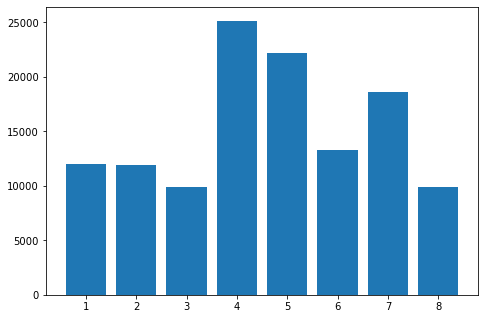

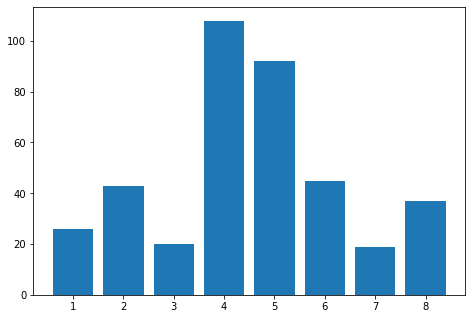

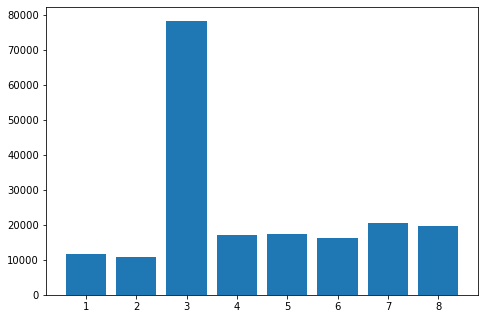

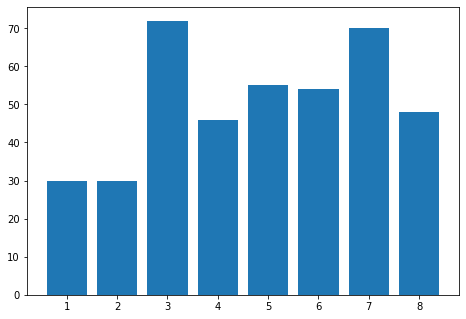

[0.0025875452820424355, 0.002798507462686567, 0.0009180160652811424, 0.002677843753638375, 0.0031378366042902786, 0.0032995234021752414, 0.0034211426616489907, 0.002431241452666768]
[30.998792478868378, 33.31902985074627, 9.077342853499935, 67.34509256025149, 69.52818347786399, 43.76157888305023, 63.47245980157372, 23.955022033125665]


In [115]:
print('crc \n')
#CRC
#bgcsparse
numbers_bgcs = []
for sample in b_data2:
    for word in str(sample).split(':'):
           if word.isdigit():
                  numbers_bgcs.append(int(word))
print(numbers_bgcs)
#bgcs total
print(sum(numbers_bgcs))

#readsparse
numbers_reads =[]
for sample in r_data2:
    for word in str(sample).split(':'):
           if word.isdigit():
                  numbers_reads.append(int(word))
print(numbers_reads)
#reads total
print(sum(numbers_reads))

print('\n normal \n')
#Normal
#bgcsparse
numbers_norm_bgcs = []
for sample in b_norm_data1:
    for word in str(sample).split(':'):
           if word.isdigit():
                  numbers_norm_bgcs.append(int(word))
print(numbers_norm_bgcs)
#bgcs total
print(sum(numbers_norm_bgcs))

#readsparse
numbers_norm_reads =[]
for sample in r_norm_data1:
    for word in str(sample).split(':'):
           if word.isdigit():
                  numbers_norm_reads.append(int(word))
print(numbers_norm_reads)
#reads total
print(sum(numbers_norm_reads))

#Calcs: 

#1. plot barchart of samples across
#crc read counts across samples
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mylabels = list(range(1, 9))
students = numbers_reads
ax.bar(mylabels,students)
plt.show()
#crc bgc counts across samples
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mylabels1 = list(range(1, 9))
students1 = numbers_bgcs
ax.bar(mylabels1,students1)
plt.show()

#normal bgc counts across samples
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mylabels2 = list(range(1, 9))
students2 = numbers_norm_reads
ax.bar(mylabels2,students2)
plt.show()
#crc bgc counts across samples
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mylabels3 = list(range(1, 9))
students3 = numbers_norm_bgcs
ax.bar(mylabels3,students3)
plt.show()

#2. plot normalised of same
from operator import truediv
res = list(map(truediv, numbers_norm_bgcs, numbers_norm_reads))
print(res)
from operator import mul
multiplied = list(map(mul, res, numbers_reads))
print(multiplied)
#BADDDD


#DONE BELOW IN NEXT CODE BLOCK
from operator import truediv
bgc_crc = list(map(truediv, numbers_bgcs, numbers_reads))
print(res)
normalised_bgc_norm = bgc_crc*10000
bgc_norm = list(map(truediv, numbers_norm_bgcs, numbers_norm_reads))
normalised_bgc_norm = bgc_norm*10000

244.23158675706367
[21.702838063439064, 36.116243910633294, 20.226537216828476, 42.94405344148873, 41.51999277913169, 33.92897534494458, 10.240931385759714, 37.55201461483812]
212.716566844298
[25.875452820424357, 27.98507462686567, 9.180160652811423, 26.77843753638375, 31.378366042902787, 32.99523402175242, 34.21142661648991, 24.31241452666768]


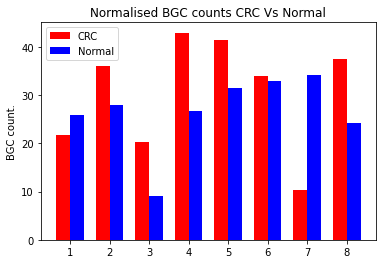

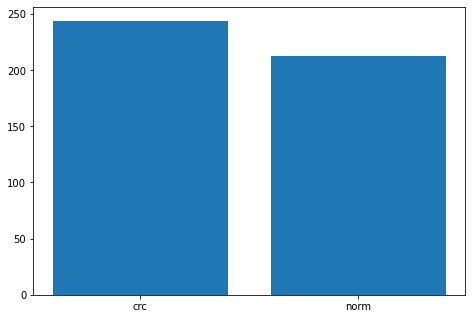

In [135]:
#RETRY  BGC_COUNT/READS X 10,000
#normalised at bgc hts per 10000 reads
from operator import truediv
bgc_crc = list(map(truediv, numbers_bgcs, numbers_reads))
normalised_crc_norm = [i * 10000 for i in bgc_crc]
bgc_norm = list(map(truediv, numbers_norm_bgcs, numbers_norm_reads))
normalised_bgc_norm = [i * 10000 for i in bgc_norm]

print(sum(normalised_crc_norm))
print(normalised_crc_norm)

print(sum(normalised_bgc_norm))
print(normalised_bgc_norm)

#Import packages for graphing/math
import numpy as np
import matplotlib.pyplot as plt

N = 8
#crc
menMeans = normalised_crc_norm
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='red')

#normal
womenMeans = normalised_bgc_norm
#(25, 32, 34, 20, 25)
rects2 = ax.bar(ind+width, womenMeans, width, color='blue')

#Basic paired plot for 
ax.set_ylabel('BGC count.')
ax.set_title('Normalised BGC counts CRC Vs Normal')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('1', '2', '3', '4', '5', '6', '7', '8') )
ax.legend( (rects1[0], rects2[0]), ('CRC', 'Normal') )
plt.show()

#Basic barplot for normalised CRC vs Normal count data
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mylabels = ["crc", "norm"]
students = [244.23,212.71]
ax.bar(mylabels,students)
plt.show()

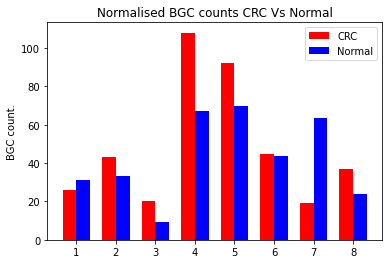

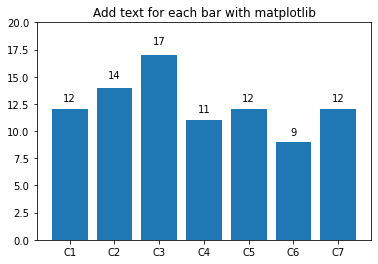

In [123]:
#SAMPLE NORMALISED
##############multibar
import numpy as np
import matplotlib.pyplot as plt

N = 8
#crc
menMeans = numbers_bgcs
#(20, 35, 30, 35, 27)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='red')

#normal
womenMeans = multiplied
#(25, 32, 34, 20, 25)
rects2 = ax.bar(ind+width, womenMeans, width, color='blue')

# add some
ax.set_ylabel('BGC count.')
ax.set_title('Normalised BGC counts CRC Vs Normal')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('1', '2', '3', '4', '5', '6', '7', '8') )

ax.legend( (rects1[0], rects2[0]), ('CRC', 'Normal') )

plt.show()
#####################################easy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

bar_x = [1,2,3,4,5,6,7]
bar_height = [12,14,17,11,12,9,12]
bar_tick_label = ['C1','C2','C3','C4','C5','C6','C7']
bar_label = [12,14,17,11,12,9,12]

bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label)

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)

plt.ylim(0,20)

plt.title('Add text for each bar with matplotlib')

plt.savefig("add_text_bar_matplotlib_01.png", bbox_inches='tight')
plt.show()




#BAD EXECUTION SUMMING

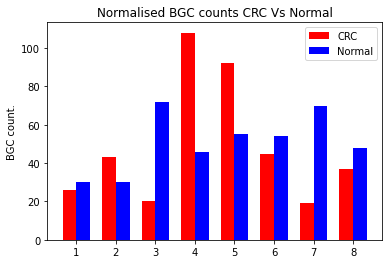

In [124]:
#SAMPLE NON-NORMALISED!
#multibar
import numpy as np
import matplotlib.pyplot as plt

N = 8
#crc
menMeans = numbers_bgcs
#(20, 35, 30, 35, 27)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='red')

#normal
womenMeans = numbers_norm_bgcs
#(25, 32, 34, 20, 25)
rects2 = ax.bar(ind+width, womenMeans, width, color='blue')

# add some
ax.set_ylabel('BGC count.')
ax.set_title('Normalised BGC counts CRC Vs Normal')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('1', '2', '3', '4', '5', '6', '7', '8') )
ax.legend( (rects1[0], rects2[0]), ('CRC', 'Normal') )
plt.show()